### BEGINNER LEVEL TASK (PART 02):-
**Sample Sales Forecast with Moving Average**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load training dataset
df = pd.read_csv("train.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
# Aggregate total sales per day
daily_sales = df.groupby('date')['sales'].sum().reset_index()

daily_sales.head()


,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


In [4]:
# Weekly Moving Average (7 days)
daily_sales['MA_7'] = daily_sales['sales'].rolling(window=7).mean()

# Monthly Moving Average (30 days)
daily_sales['MA_30'] = daily_sales['sales'].rolling(window=30).mean()

daily_sales.head(10)


,date,sales,MA_7,MA_30
0,2013-01-01,2511.618999,NaN,NaN
1,2013-01-02,496092.417944,NaN,NaN
2,2013-01-03,361461.231124,NaN,NaN
3,2013-01-04,354459.677093,NaN,NaN
4,2013-01-05,477350.121229,NaN,NaN
5,2013-01-06,519695.401088,NaN,NaN
6,2013-01-07,336122.801066,363956.181220,NaN
7,2013-01-08,318347.777981,409075.632504,NaN
8,2013-01-09,302530.809018,381423.974086,NaN
9,2013-01-10,258982.003049,366784.084361,NaN


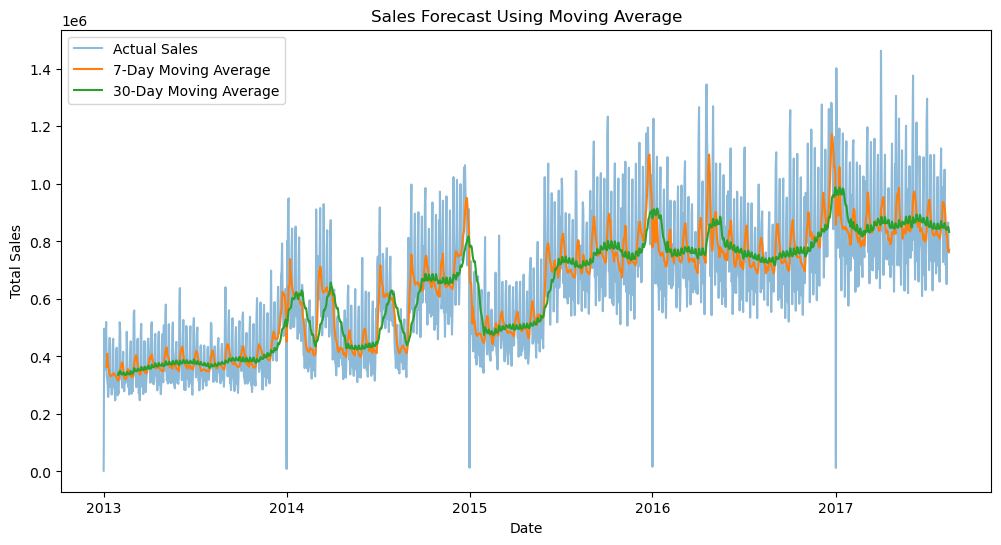

In [5]:
plt.figure(figsize=(12,6))

plt.plot(daily_sales['date'], daily_sales['sales'], label='Actual Sales', alpha=0.5)
plt.plot(daily_sales['date'], daily_sales['MA_7'], label='7-Day Moving Average')
plt.plot(daily_sales['date'], daily_sales['MA_30'], label='30-Day Moving Average')

plt.title("Sales Forecast Using Moving Average")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()


In [6]:
# Last available moving averages as forecast
weekly_forecast = daily_sales['MA_7'].iloc[-1]
monthly_forecast = daily_sales['MA_30'].iloc[-1]

print("Next Day Forecast (7-Day MA):", weekly_forecast)
print("Next Day Forecast (30-Day MA):", monthly_forecast)



Next Day Forecast (7-Day MA): 770536.4089387143
Next Day Forecast (30-Day MA): 832844.22675466


**Conclusion:**
*A simple sales forecasting model was implemented using moving averages to smooth historical sales data and identify underlying trends. Weekly and monthly rolling averages provided baseline forecasts for future sales.*